## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
#1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>

import numpy as np
#2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>

import matplotlib.pyplot as plt
#3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

import sklearn
#4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
#    - <https://scikit-learn.org/stable/user_guide.html>

## 데이터 내의 결측값들을 제거합니다.

In [2]:
pd.set_option('display.max_columns', None)
# pandas dataframe의 모든 열을 출력하기 위한 설정입니다.

df = pd.read_csv('tox21_dataset.csv')
# 이 주피터파일과 같은 디렉터리에 존재하는 'tox21_dataset.csv' 파일을 읽어와 df에 저장합니다.

df = df.dropna(subset=['NR-AR'])
# 'NR-AR' 열에 결측치가 존재하는 행을 제거합니다.
#   우리가 분석하고자 하는 'NR-AR' 열에 결측치가 존재하는 행은 분석에 방해가 될 수 있기 때문에 제거합니다.

df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
# 분석에 사용하지 않을 반응 변수를 삭제합니다.

df = df.drop(columns='mol_id')
# 'mol_id' 열은 분석에 사용하지 않을 변수이므로 삭제합니다.

df
# 데이터프레임을 출력합니다.
#   주피터 노트북에서는 print() 함수를 사용하지 않아도 마지막 열에 입력된 행을 출력합니다.

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

In [3]:
X = df.iloc[:, :-1]
# 독립 변수를 X에 저장합니다. 독립 변수는 'NR-AR' 열을 제외한 나머지 열입니다.

y = df.iloc[:, -1]
# 종속 변수를 y에 저장합니다. 종속 변수는 'NR-AR' 열입니다.

## SMOTE를 수행합니다.

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# SMOTE 데이터 증강을 하기 위해서 SMOTE 객체를 생성합니다.

X_resampled, y_resampled = smote.fit_resample(X, y)
# SMOTE를 사용하여 데이터를 증강합니다.


X = X_resampled
# 증강된 독립 변수를 X에 저장합니다.
y = y_resampled
# 증강된 종속 변수를 y에 저장합니다.

위 코드 블럭은 SMOTE를 이용한 데이터 증강을 수행합니다. SMOTE(Synthetic Minority Over-sampling Technique)는 불균형한 데이터셋에서 소수 클래스 데이터를 증강하는 방법입니다. 데이터셋에는 종종 한 클래스의 데이터가 다른 클래스보다 훨씬 많은 경우가 있습니다. 이러한 불균형한 데이터셋을 다룰 때는 모델이 소수 클래스를 제대로 학습하지 못할 수 있습니다. 이를 해결하기 위해 SMOTE는 소수 클래스의 샘플을 증강하여 데이터셋을 균형있게 만듭니다.
- 더 자세한 내용은 아래의 링크를 참조하세요.
  - <https://arxiv.org/pdf/1106.1813.pdf>

## 모델을 생성합니다.

In [5]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델을 사용하기 위한 라이브러리를 불러옵니다.


# 로지스틱 회귀 모델 생성
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight=None)
# 로지스틱 회귀 모델을 생성하고, 모델을 model에 저장합니다.

model.fit(X, y)
# 모델을 학습시킵니다.

LogisticRegression(solver='liblinear')

위 코드 블럭에서 사용하는 모델은 로지스틱 회귀 모델입니다.

- 로지스틱 회귀 모델은 선형 회귀 모델을 기반으로 하되, 시그모이드 함수를 사용하여 0과 1 사이의 값을 출력하는 모델입니다. 이 모델은 이진 분류 문제에 주로 사용됩니다.
전처리를 수행한 데이터에 대해서 로지스틱 회귀 모델을 학습시키고, 학습된 모델을 사용하여 예측을 수행해보겠습니다.

## 로지스틱 회귀 모형은 아래의 하이퍼파라미터를 조정할 수 있습니다.

목적함수
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^2
$$

- 로지스틱 회귀 모형의 자세한 설명은 아래의 링크를 참조하세요.
    - <https://en.wikipedia.org/wiki/Logistic_regression>


1. penalty: 규제의 종류를 설정합니다. 기본값은 'l2'입니다.
    - 'l2': L2 규제를 의미합니다.
    - 위의 식에서 마지막 항이 L2 규제 부분입니다.
2. C: 규제의 강도를 설정합니다. 기본값은 1.0입니다.
    - C가 작을수록 규제가 강해집니다.

3. solver: 최적화에 사용할 알고리즘을 설정합니다. 기본값은 'lbfgs'입니다.
    - 'newton-cg': Netwon-Conjugate Gradient 알고리즘입니다.
    - 'lbfgs': L-BFGS 알고리즘입니다.
    - 'liblinear': 라이브러리의 솔버입니다.
    - 'sag': Stochastic Average Gradient 알고리즘입니다.
    - 'saga': SAGA 알고리즘입니다.
    - 각 알고리즘 별로 장단점이 있으며, 데이터의 크기에 따라 성능이 달라질 수 있습니다.

4. class_weight: 클래스의 가중치를 설정합니다. 기본값은 None입니다.
    - None: 클래스의 가중치를 동일하게 설정합니다.
    - 'balanced': 클래스의 빈도에 반비례하게 가중치를 설정합니다.
    - 혹은 사용자가 직접 클래스의 가중치를 설정할 수 있습니다.

## 결정 경계 시각화

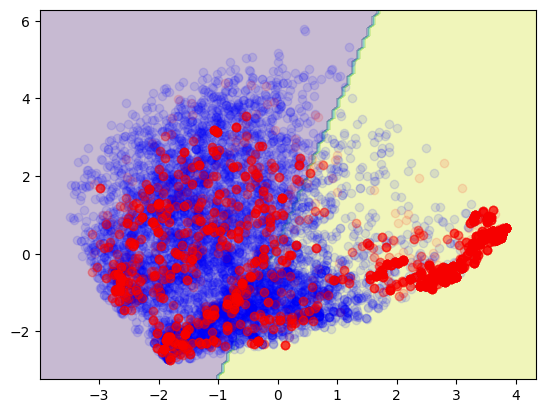

array([[5183, 1773],
       [2984, 3972]])

In [8]:
from sklearn.decomposition import PCA
# PCA를 사용하기 위한 라이브러리를 불러옵니다.
from sklearn.metrics import confusion_matrix
# 혼동 행렬을 사용하기 위한 라이브러리를 불러옵니다.



# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
# PCA 객체를 생성하고, 2개의 주성분을 사용하여 PCA를 수행합니다.
X_pca = pca.fit_transform(X)
# PCA를 수행하고, 변환된 피처를 X_pca에 저장합니다.



# 결정 트리 모델 학습
model_pca = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight=None)
# 로지스틱 회귀 모델을 생성하고, 모델을 model_pca에 저장합니다.
model_pca.fit(X_pca, y)
# 모델을 학습시킵니다.



# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에 0.5를 더한 값까지 100개의 구간으로 나눈 배열을 x1s에 저장합니다.
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에 0.5를 더한 값까지 100개의 구간으로 나눈 배열을 x2s에 저장합니다.
x1, x2 = np.meshgrid(x1s, x2s)
# x1s와 x2s를 격자로 나눈 배열을 x1, x2에 저장합니다.
X_new = np.c_[x1.ravel(), x2.ravel()]
# x1과 x2를 1차원 배열로 변환하고, 변환된 배열을 열로 합쳐 X_new에 저장합니다.
y_pred = model_pca.predict(X_new).reshape(x1.shape)
# X_new에 대한 예측값을 계산하고, 예측값을 x1의 형태로 변환하여 y_pred에 저장합니다.


plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
# y가 0인 행을 산점도로 그리고, 색을 파란색으로 지정합니다.
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
# y가 1인 행을 산점도로 그리고, 색을 빨간색으로 지정합니다.
plt.show()
# 그래프를 출력합니다.

confusion_matrix(y, model_pca.predict(X_pca))
# 혼동 행렬을 출력합니다.

## 결정 경계 시각화

위 그림은 PCA를 사용하여 피처를 2개로 줄인 후 로지스틱 회귀 모형을 학습한 결과입니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

In [9]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
# 혼동 행렬을 계산하기 위한 라이브러리를 불러옵니다.

confusion_matrix(y, model.predict(X))
# 혼동 행렬을 출력합니다.

array([[6157,  799],
       [ 737, 6219]])

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6942개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 14개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 176개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 133개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)